# First glance on Onetahi

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Meteo

In [19]:
#open the meteo data, the values are separated by ;

meteo_path = '/home/leo/Documents/These/Données/Meteo/Q_987_previous-1950-2023_RR-T-Vent.csv'
meteo_df = pd.read_csv(meteo_path, sep=';')
# print the values of the column 'NOM_USUEL' to see what stations are available
noms = meteo_df['NOM_USUEL'].unique()
print(noms)


['ANAA1' 'TETIAROA 1' 'TETIAROA AUTO' 'ARUE 3' 'ARUE 4' 'KAUKURA'
 'APATAKI' 'FAANUI 1' 'BORA-BORA-MOTU-AERO' 'NUNUE 1' 'NUNUE 2' 'ANAU 1'
 'ANAU 2' 'NUNUE 3' 'FAANUI 2' 'ANAU3' 'FAAA 1' 'FAAA' 'FAAA 3' 'FAAA 4'
 'FAAA 5' 'FAAA 6' 'FAKARAVA' 'FAKAHINA' 'OMOA' 'HANAVAVE' 'RIKITEA'
 'MANGAREVA TAKU' 'MANGAREVA-AERO' 'MANGAREVA' 'ATIAOA' 'HEREHERETUE'
 'HAO AERO' 'HIKUERU' 'HITIAA 1' 'TIAREI 1' 'PAPENOO 1' 'PAPENOO 2'
 'TIAREI 2' 'TIAREI 3' 'HITIAA 3' 'HITIAA 4' 'PAPENOO 3' 'MAHAENA 1'
 'HITIAA 5' 'HIVA-OA' 'HANAPAAOA' 'HANAIAPA' 'PUAMAU' 'FARE' 'FAIE'
 'PAREA 1' 'MAEVA' 'MAROE' 'PAREA 2' 'TEFARERII' 'MAHINA 1' 'MAHINA 3'
 'MAHINA 5' 'MAHINA 6' 'MAHINA7' 'MAHINA 8' 'MAHINA 9' 'MAKEMO' 'MAKEMO 1'
 'MANIHI AERO' 'PETEI' 'MOPELIA 2' 'AFAREIATU 1' 'HAAPITI 1' 'PAOPAO 1'
 'PAPETOAI 1' 'PAPETOAI 2' 'PAOPAO 2' 'AFAREAITU 2' 'PAPETOAI 3'
 'PAPETOAI 4' 'HAAPITI 2' 'HAAPITI 3' 'TEAVARO 2' 'HAAPITI 4' 'HAAPITI5'
 'HAAPITI 6' 'ATIHA' 'VAIANAE 1' 'NAPUKA METEO' 'NAPUKA' 'TAIOHAE POSTE'
 'HATIHEU' 'TAI

In [20]:
# keep only the values where 'NOM_USUEL' == 'TETIAROA 1'
meteo_df = meteo_df[meteo_df['NOM_USUEL'] == 'TETIAROA 1']


In [21]:
# Keep only the AAAAMMJJ, RR, TX, TM and FXI2 columns
meteo_df = meteo_df[['AAAAMMJJ', 'RR', 'TX', 'TM', 'FFM', 'TN']]

# Convert the 'AAAAMMJJ' column to datetime format and remove all values where the date is before 2014-01-01, same for df2
meteo_df['AAAAMMJJ'] = pd.to_datetime(meteo_df['AAAAMMJJ'], format='%Y%m%d')
meteo_df = meteo_df[meteo_df['AAAAMMJJ'] >= pd.to_datetime('2018-05-01')]


In [22]:
meteo_df.head()

,AAAAMMJJ,RR,TX,TM,FFM,TN
15096,2019-10-02,0.0,26.6,25.8,9.7,25.6
15097,2019-10-03,1.6,26.8,25.8,9.2,24.9
15098,2019-10-04,1.0,29.0,26.3,3.0,24.2
15099,2019-10-05,5.4,28.6,25.9,2.1,24.0
15100,2019-10-06,0.0,25.9,25.2,8.3,24.5


In [23]:
# Now take the min and max values for each day
meteo_df_min = meteo_df.groupby('AAAAMMJJ').min().reset_index()
meteo_df_max = meteo_df.groupby('AAAAMMJJ').max().reset_index()

# Now do a single data set with the sum of RR for each day, only with the RR column
meteo_df_sum = meteo_df.groupby('AAAAMMJJ')['RR'].sum().reset_index()
meteo_df_sum['precip_1week'] = meteo_df_sum['RR'].rolling(window=7, min_periods=1).sum()
meteo_df_sum['precip_2weeks'] = meteo_df_sum['RR'].rolling(window=14, min_periods=1).sum()

# Take a sliding mean that take sinto account the previous two days and the next wo days for TM
meteo_df_min['TM_sliding_mean'] = meteo_df_min['TM'].rolling(window=5, min_periods=1).mean()
meteo_df['TM_sliding_mean'] = meteo_df['TM'].rolling(window=5, min_periods=1).mean()


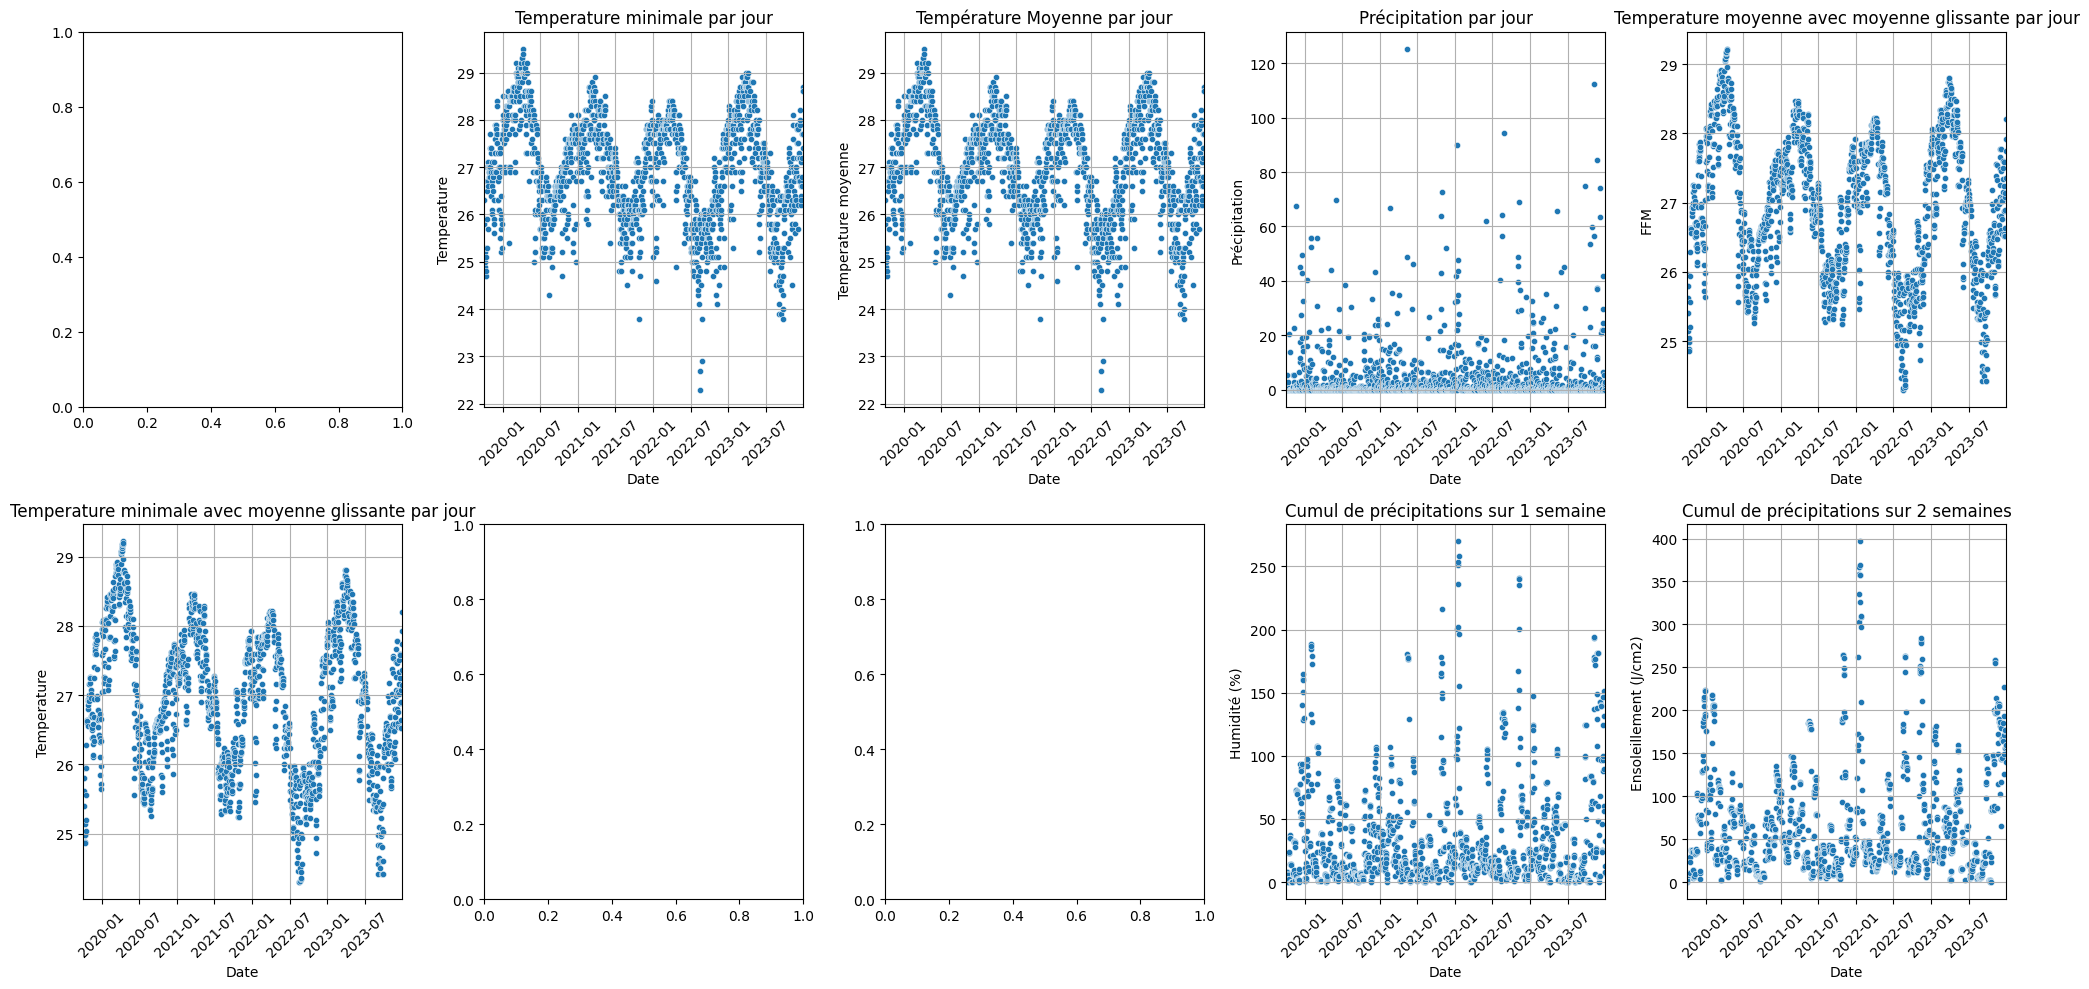

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
date_min = meteo_df['AAAAMMJJ'].min()
date_max = meteo_df['AAAAMMJJ'].max()
# Plot 1: Number of Individuals by Date (Capture)

# Plot 2: Temperature minimale par jour
sns.scatterplot(data=meteo_df_min, x='AAAAMMJJ', y='TM', s=20, ax=axs[0, 1])
axs[0, 1].set_title('Temperature minimale par jour')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_xlim(date_min, date_max)
axs[0, 1].set_ylabel('Temperature')
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Température Moyenne par jour
sns.scatterplot(data=meteo_df, x='AAAAMMJJ', y='TM', s=20, ax=axs[0, 2])
axs[0, 2].set_title('Température Moyenne par jour')
axs[0, 2].set_xlabel('Date')
axs[0, 2].set_xlim(date_min, date_max)
axs[0, 2].set_ylabel('Temperature moyenne')
axs[0, 2].grid(True)
axs[0, 2].tick_params(axis='x', rotation=45)

# Plot 4: Précipitation par jour
sns.scatterplot(data=meteo_df_sum, x='AAAAMMJJ', y='RR', s=20, ax=axs[0, 3])
axs[0, 3].set_title('Précipitation par jour')
axs[0, 3].set_xlabel('Date')
axs[0, 3].set_xlim(date_min, date_max)
axs[0, 3].set_ylabel('Précipitation')
axs[0, 3].grid(True)
axs[0, 3].tick_params(axis='x', rotation=45)

# Plot 5: FFM values
sns.scatterplot(data=meteo_df, x='AAAAMMJJ', y='TM_sliding_mean', s=20, ax=axs[0, 4])
axs[0, 4].set_title('Temperature moyenne avec moyenne glissante par jour')
axs[0, 4].set_xlabel('Date')
axs[0, 4].set_xlim(date_min, date_max)
axs[0, 4].set_ylabel('FFM')
axs[0, 4].grid(True)
axs[0, 4].tick_params(axis='x', rotation=45)

# Plot 6: Temperature mpyenne glissante
sns.scatterplot(data=meteo_df_min, x='AAAAMMJJ', y='TM_sliding_mean', s=20, ax=axs[1, 0])
axs[1, 0].set_title('Temperature minimale avec moyenne glissante par jour')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_xlim(date_min, date_max)
axs[1, 0].set_ylabel('Temperature')
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 9: FFM values
sns.scatterplot(data=meteo_df_sum, x='AAAAMMJJ', y='precip_1week', s=20, ax=axs[1, 3])
axs[1, 3].set_title('Cumul de précipitations sur 1 semaine')
axs[1, 3].set_xlabel('Date')
axs[1, 3].set_xlim(date_min, date_max)
axs[1, 3].set_ylabel('Humidité (%)')
axs[1, 3].grid(True)
axs[1, 3].tick_params(axis='x', rotation=45)

# Plot 10: Temperature mpyenne glissante
sns.scatterplot(data=meteo_df_sum, x='AAAAMMJJ', y='precip_2weeks', s=20, ax=axs[1, 4])
axs[1, 4].set_title('Cumul de précipitations sur 2 semaines')
axs[1, 4].set_xlabel('Date')
axs[1, 4].set_xlim(date_min, date_max)
axs[1, 4].set_ylabel('Ensoleillement (J/cm2)')
axs[1, 4].grid(True)
axs[1, 4].tick_params(axis='x', rotation=45)

# save the plot to a file
plt.savefig('../img/meteo_plot.png')
plt.tight_layout()
plt.show()


# Creation of the meteo dataframe for simulations

We want to keep and precip_2week only, with a linear interpolation to get a dataset with time step of np.linspace(0, 1552, 100001)

In [36]:
dt_new = 0.01
# Create a time vector from 0 to (number of days - 1)
time_original = np.arange(len(meteo_df_min))
time_new = np.arange(time_original.min(), time_original.max(), dt_new)
temp_new = np.interp(time_new, time_original, meteo_df['TM'])
precip_new = np.interp(time_new, time_original, meteo_df_sum['precip_2weeks'])

In [37]:
df_resampled = pd.DataFrame({'time': time_new, 'TM': temp_new, 'precip2': precip_new})

In [38]:
df_resampled.head()

,time,TM,precip2
0,0.00,25.8,0.000
1,0.01,25.8,0.016
2,0.02,25.8,0.032
3,0.03,25.8,0.048
4,0.04,25.8,0.064


In [39]:
import os

# Ensure the directory exists
os.makedirs('../Data', exist_ok=True)

# Export to csv
df_resampled.to_csv('../Data/meteo_tetiaroa_resampled.csv', index=False)